# Creating University Program Curriculumn based on Clustering of Skills in Job Postings  (Assignment 3 template)


### Import Python libraries

In [1]:
import numpy as np
import pandas as pd
import os
import requests
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Machine Learning libraries
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)

### Load job postings web-scraped from Indeed.com

In [3]:
## Install module to download files from Google Drive
try:
    import gdown
except:
    !pip install gdown
    import gdown

In [142]:
## Sample dataset file name (replace this sample dataset with the dataset to be used in Assignment 3)
# filename_data = 'Indeed_sample_job_vacancies.csv'
filename_data = 'Indeed_assignment3_job_vacancies.csv'

## File name of the dataset to be used for Assignment 3 (uncomment for your assignment)
# filename_data = 'Indeed_assignment3_job_vacancies.csv'

In [5]:
## Download data file
if filename_data == 'Indeed_sample_job_vacancies.csv':
    url = 'https://drive.google.com/uc?id=1P1TD6Dwfim60wS6WgIinnCj3eavXxyuB'
elif filename_data == 'Indeed_assignment3_job_vacancies.csv':
    url = 'https://drive.google.com/uc?id=1riRUR6izR9Buuyo74AC2NF98ecSeR78t'
else:
    print("Selected data file does not exist")
gdown.download(url, filename_data, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1riRUR6izR9Buuyo74AC2NF98ecSeR78t
To: /Users/Ihor_Perepecha/Library/Mobile Documents/com~apple~CloudDocs/AUK/assignment3/Indeed_assignment3_job_vacancies.csv
100%|██████████| 39.4M/39.4M [00:03<00:00, 11.9MB/s]


'Indeed_assignment3_job_vacancies.csv'

In [143]:
## Read csv file (dataset)

results = pd.read_csv(filename_data)

In [144]:
## Display dataset as pandas dataframe
results[['Title', 'Company', 'Location', 'Descriptions']].head()

,Title,Company,Location,Descriptions
0,Sr. Data Scientist,Adobe,"San Francisco, CA 94103 (South Of Market area)",Our Company\n\nChanging the world through digi...
1,"Data Scientist, Abuse Prevention",Live Nation,"Remote in Beverly Hills, CA 90210",Job Summary:\nWHO ARE WE?\nLive Nation Enterta...
2,Computational Biologist / Data Scientist,Inceptive,"Remote in Palo Alto, CA","At Inceptive, we don't have titles. The title ..."
3,Associate Data Scientist (Remote),Freenome Holdings,"Remote in South San Francisco, CA 94080",Why join Freenome?\nFreenome is a high-growth ...
4,Applied Data Scientist - Ex Machina,C3 AI,"Redwood City, CA","C3.ai, Inc. (NYSE:AI) is a leading provider of..."


### Extract skills from job postings

Replace with your own classification of skills. You may use ChatGPT to generate Python code for extracting skills from job descriptions.

In [186]:
# Programming Skills
pskills = {
    'Python': [],
    'R': [],
    'Java': [],
    'C++': [],
    'HTML/CSS': [],
    'JavaScript': [],
    'Matlab': [],
    'SQL': [],
    'PySpark': [],
    'Hadoop': [],
}

# Machine Learning and Statistical Analysis Skills
mskills = {
    'Regression': [],
    'Classification': [],
    'Clustering': [],
    'Natural Language': [],
    'TimeSeries': [],
    'AI': [],
    'BigData': [],
    'ML': [],
}

# Data Handling and Processing Skills
dskills = {
    'Cleaning': [],
    'Visualization': [],
    'Wrangling': [],
    'ETL': [],
    'Mining': [],
    'Datalake': [],
    'DWH': [],
    'MySQL': [],
    'PostgreSQL': [],
    'Oracle': [],
    'Redshift': [],
    'Snowflake': [],
    'BigQuey': []
}

# Cloud Skills
cskills = {
    'AWS': [],
    'Azure': [],
    'GCP': [], 
}

# Business and Strategy Skills
bskills = {
    'Strategic Thinking': [],
    'Customer Centricity': [],
    'Product Management': [],
    'Market Analysis': []
}

# Soft Skills and Collaboration
sskills = {
    'Problem Solving': [],
    'Adaptability': [],
    'Leadership': [],
    'Critical Thinking': []
}

# Domain-Specific Expertise
domskills = {
    'Finance': [],
    'Healthcare': [],
    'E-commerce': [],
    'Supply Chain': []
}


In [187]:
import re

In [188]:
def is_exists(text: str, key_text: str) -> int:
    tag = re.escape(key_text)

    if len(tag) <=2 and not re.search(tag, text):
        return 0

    if  re.search(tag, text, re.IGNORECASE):
        return 1

    return 0

In [149]:
for ir, dfr in results.iterrows():

    cleantext = str(dfr["Descriptions"]).lower()

    for skill in pskills.keys():
        pskills[skill].append(is_exists(cleantext, skill))

    for skill in mskills.keys():
        mskills[skill].append(is_exists(cleantext, skill))

    for skill in dskills.keys():
        dskills[skill].append(is_exists(cleantext, skill))

    for skill in cskills.keys():
        cskills[skill].append(is_exists(cleantext, skill))

    for skill in bskills.keys():
        bskills[skill].append(is_exists(cleantext, skill))

    for skill in sskills.keys():
        sskills[skill].append(is_exists(cleantext, skill))

    for skill in domskills.keys():
        domskills[skill].append(is_exists(cleantext, skill))


In [83]:
## Create dataframe with extracted skills (1 if a skill was found in job description, 0 if a skills was not found in job description)
df1 = results[['Title', 'Company', 'Location', 'Descriptions']].copy()
df2 = pd.DataFrame(pskills)
df3 = pd.DataFrame(mskills)
df4 = pd.DataFrame(dskills)
df5 = pd.DataFrame(cskills)
df6 = pd.DataFrame(bskills)
df7 = pd.DataFrame(sskills)
df9 = pd.DataFrame(domskills)
frames = [df1, df2, df3, df4, df5, df6, df7, df9]
res = pd.concat(frames, axis = 1)
res.head()

,Title,Company,Location,Descriptions,Python,R,Java,C++,HTML/CSS,JavaScript,...,Product Management,Market Analysis,Problem Solving,Adaptability,Leadership,Critical Thinking,Finance,Healthcare,E-commerce,Supply Chain
0,Sr. Data Scientist,Adobe,"San Francisco, CA 94103 (South Of Market area)",Our Company\n\nChanging the world through digi...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Data Scientist, Abuse Prevention",Live Nation,"Remote in Beverly Hills, CA 90210",Job Summary:\nWHO ARE WE?\nLive Nation Enterta...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Computational Biologist / Data Scientist,Inceptive,"Remote in Palo Alto, CA","At Inceptive, we don't have titles. The title ...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Associate Data Scientist (Remote),Freenome Holdings,"Remote in South San Francisco, CA 94080",Why join Freenome?\nFreenome is a high-growth ...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Applied Data Scientist - Ex Machina,C3 AI,"Redwood City, CA","C3.ai, Inc. (NYSE:AI) is a leading provider of...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
## Save skills as 2D array
df = res.iloc[:,4:]
df_summary = df.apply(pd.to_numeric)
a = df_summary.values

print("Number of job postings:", a.shape[0])
print(a)

Number of job postings: 8124
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]]


### Hierarchical clustering of skills

Import Machine Learning libraries in Python

In [151]:
## Create empty matrix to fill
D = np.zeros([a.shape[1],a.shape[1]])

## Find all element-wise skill proximities (distances)
for k in range(a.shape[0]):
    for i in range(a.shape[1]):
        for j in range(a.shape[1]):
            D[i,j] = D[i,j] + abs(a[k,i]-a[k,j])

In [195]:
## Creating Dendrogram for our data (Y is linkage matrix)

## You may try different methods
# Y = sch.linkage(D, method='complete')

# Y = sch.linkage(D, method='average')
Y = sch.linkage(D, method='centroid')

[]

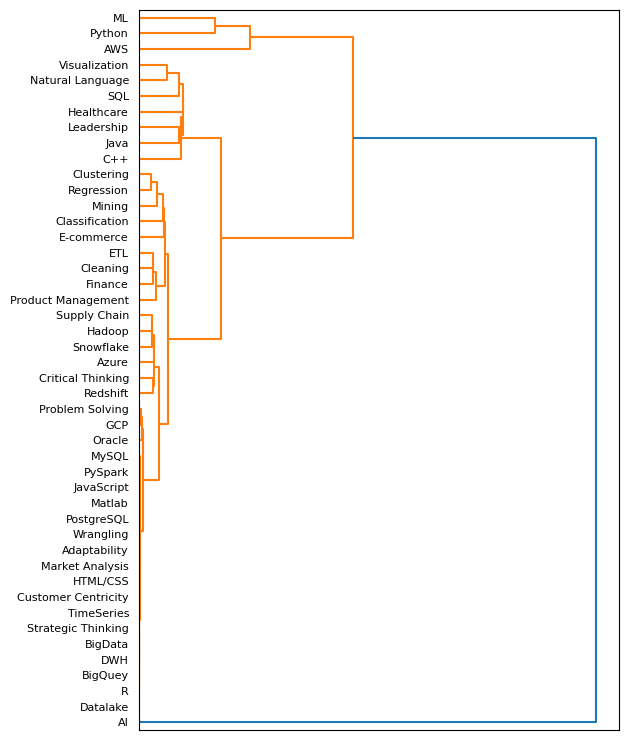

In [196]:
## Plot dendrogram

fig = plt.figure(figsize=(12,12))
ax = fig.add_axes([0.1,0.1,0.4,0.6])

Z = sch.dendrogram(Y, orientation='right')
labels = df_summary.columns[Z['leaves']]
ax.set_xticks([])
ax.set_yticklabels(labels)

plt.savefig('dendrogram.png', format='png', bbox_inches='tight')
plt.plot()

### Print clusters for selected distance level

In [197]:
## Cutting the dendrogram at max_d
max_d = 0.35
# max_d = 0.2

[]

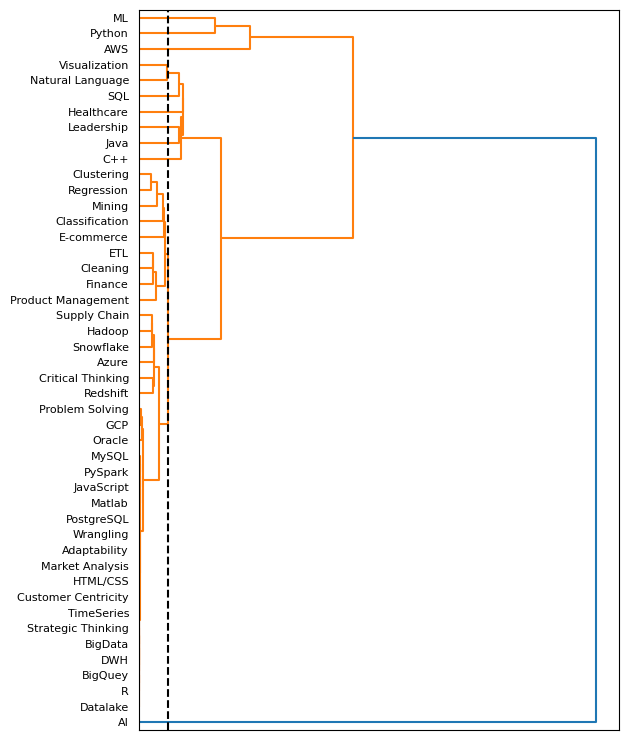

In [198]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_axes([0.1,0.1,0.4,0.6])

Z = sch.dendrogram(Y, orientation='right')
labels = df_summary.columns[Z['leaves']]
ax.set_xticks([])
ax.set_yticklabels(labels)

# Cutting the dendrogram at max_d
plt.axvline(x=max_d*D.max(), c='k', linestyle='--')

plt.plot()

In [199]:
## Identify clusters with max_d cut

lbs = sch.fcluster(Y, max_d*D.max(), 'distance')
clustr = lbs[Z['leaves']]

clust_skls = {}
for k in list(set(clustr)):
    clust_skls[k] = []

for j in range(len(labels)):
    clust_skls[clustr[j]].append(labels[j])

In [200]:
for key, value in clust_skls.items():
    print(key, value)

1 ['Datalake', 'R', 'BigQuey', 'DWH', 'BigData', 'Strategic Thinking', 'TimeSeries', 'Customer Centricity', 'HTML/CSS', 'Market Analysis', 'Adaptability', 'Wrangling', 'PostgreSQL', 'Matlab', 'JavaScript', 'PySpark', 'MySQL', 'Oracle', 'GCP', 'Problem Solving', 'Redshift', 'Critical Thinking', 'Azure', 'Snowflake', 'Hadoop', 'Supply Chain']
2 ['Product Management', 'Finance', 'Cleaning', 'ETL', 'E-commerce', 'Classification', 'Mining', 'Regression', 'Clustering']
3 ['Java']
4 ['Leadership']
5 ['Natural Language', 'Visualization']
6 ['SQL']
7 ['Healthcare']
8 ['C++']
9 ['Python']
10 ['ML']
11 ['AWS']
12 ['AI']


In [185]:
print("Number of automatically created clusters:",len(clust_skls))

Number of automatically created clusters: 18


### Manually adjust clusters before analysis (if necessary)

In [202]:
clust_skills = {
    1: ['Finance'],
    2: ['Product Management', 'Azure', 'Snowflake', 'Hadoop', 'Redshift'],
    3: ['Cleaning', 'ETL', 'SQL'],
    5: ['E-commerce'],
    6: ['Python', 'Mining', 'Regression', 'Clustering', 'Classification'],
    8: ['Healthcare'],
    9: ['Natural Language'],
    10: ['Visualization'],
    12: ['Java'],
    13: ['Leadership', 'Critical Thinking', 'Problem Solving'],
    14: ['C++'],
    15: ['AWS'],
    16: ['Python'],
    17: ['Supply Chain']
}


In [203]:
len(clust_skills)
print("Number of manually adjusted clusters:",len(clust_skills))

Number of manually adjusted clusters: 14


### Import OpenAI library and load API keys

In [204]:
try:
    import openai
except:
    !pip install openai
    import openai

In [205]:
## API Key
API_KEY= ""
os.environ['OPENAI_API_KEY'] =API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

In [206]:
## OpenAI API parameters
model = "gpt-3.5-turbo" # 4K tokens
# model = "gpt-3.5-turbo-16k"
max_tokens = 1024
n = 1
stop = None
temperature = 0.5

### Create list of courses based on clusters of skills

In [207]:
input_skills = ''
for i in clust_skills.keys():
    input_skills += 'Course ' + str(i+1) + ': ' + ', '.join(clust_skills[i]) + '; '
input_skills = input_skills[:-2]

In [208]:
print(input_skills)

Course 2: Finance; Course 3: Product Management, Azure, Snowflake, Hadoop, Redshift; Course 4: Cleaning, ETL, SQL; Course 6: E-commerce; Course 7: Python, Mining, Regression, Clustering, Classification; Course 9: Healthcare; Course 10: Natural Language; Course 11: Visualization; Course 13: Java; Course 14: Leadership, Critical Thinking, Problem Solving; Course 15: C++; Course 16: AWS; Course 17: Python; Course 18: Supply Chain


#### ChatGPT prompt #1

In [209]:
prompt_1 = 'Please create a sequence of university graduate courses with course names and 10 lectures based on the following relevant list of skills to be taught in each course: {input}'

In [210]:
prompt1 = prompt_1.format(input=input_skills)
print(prompt1)

Please create a sequence of university graduate courses with course names and 10 lectures based on the following relevant list of skills to be taught in each course: Course 2: Finance; Course 3: Product Management, Azure, Snowflake, Hadoop, Redshift; Course 4: Cleaning, ETL, SQL; Course 6: E-commerce; Course 7: Python, Mining, Regression, Clustering, Classification; Course 9: Healthcare; Course 10: Natural Language; Course 11: Visualization; Course 13: Java; Course 14: Leadership, Critical Thinking, Problem Solving; Course 15: C++; Course 16: AWS; Course 17: Python; Course 18: Supply Chain


In [211]:
# Call OpenAI API for the first prompt
response1 = openai.ChatCompletion.create(
    model=model,
    messages=[
    {"role": "system", "content": "You are a helpful  assistant."},
    {"role": "user", "content": prompt1},
    ],
    max_tokens=max_tokens,
    n=n,
    stop=stop,
    temperature=temperature,
)

In [212]:
output1 = response1['choices'][0]['message']['content']
print(output1)

Course 2: Advanced Finance 
1. Introduction to Advanced Finance
2. Principles of Financial Management
3. Corporate Finance and Valuation
4. Investment Analysis
5. Portfolio Management
6. Financial Risk Management
7. Financial Markets and Institutions
8. International Finance
9. Mergers and Acquisitions
10. Financial Modeling and Forecasting

Course 3: Product Management in the Cloud
1. Introduction to Product Management
2. Understanding Azure
3. Working with Snowflake
4. Hadoop for Product Management
5. Redshift in Product Management
6. Product Development Process
7. Product Marketing Strategies
8. Product Lifecycle Management
9. Product Management in Agile
10. Case Studies in Product Management

Course 4: Data Cleaning & ETL using SQL
1. Introduction to Data Cleaning
2. Understanding ETL
3. SQL Basics
4. Advanced SQL for ETL
5. Data Cleaning using SQL
6. ETL Operations with SQL
7. Quality Assurance in Data
8. Data Transformation using SQL
9. SQL for Data Warehousing
10. Project: ETL P

#### ChatGPT prompt #2

In [213]:
prompt_2 = 'Please create a curriculumn for a university master program at the intersection of business and management on one side, and data analytics and artificial intelligence on the other side. Curriculumn should consist of the sequence of graduate courses with proposed course names and 10 lectures based on the following relevant list of skills to be taught in each course: {input}'

In [214]:
prompt2 = prompt_2.format(input=input_skills)
print(prompt2)

Please create a curriculumn for a university master program at the intersection of business and management on one side, and data analytics and artificial intelligence on the other side. Curriculumn should consist of the sequence of graduate courses with proposed course names and 10 lectures based on the following relevant list of skills to be taught in each course: Course 2: Finance; Course 3: Product Management, Azure, Snowflake, Hadoop, Redshift; Course 4: Cleaning, ETL, SQL; Course 6: E-commerce; Course 7: Python, Mining, Regression, Clustering, Classification; Course 9: Healthcare; Course 10: Natural Language; Course 11: Visualization; Course 13: Java; Course 14: Leadership, Critical Thinking, Problem Solving; Course 15: C++; Course 16: AWS; Course 17: Python; Course 18: Supply Chain


In [215]:
# Call OpenAI API for the second prompt
response2 = openai.ChatCompletion.create(
    model=model,
    messages=[
    {"role": "system", "content": "You are a helpful  assistant."},
    {"role": "user", "content": prompt2},
    ],
    max_tokens=max_tokens,
    n=n,
    stop=stop,
    temperature=temperature,
)

In [216]:
output2 = response2['choices'][0]['message']['content']
print(output2)

Master's Program in Business Management and Data Analytics

Course 1: Introduction to Business Management and Data Analytics
Lectures:
1. Overview of Business Management
2. Overview of Data Analytics and AI
3. The Intersection of Business Management and Data Analytics
4. Importance of Data in Business Decision Making
5. Introduction to AI in Business
6. Case Studies of Data-Driven Businesses
7. Data Strategy in Business
8. Data-Driven Decision Making
9. Role of AI in Business Management
10. Future Trends in Business Management and Data Analytics

Course 2: Financial Management in the Data Age
Lectures:
1. Introduction to Finance
2. Financial Data Analysis
3. Financial Forecasting using AI
4. Risk Assessment and Management with AI
5. Financial Decision Making with Data Analytics
6. Financial Modeling with AI
7. AI in Investment Management
8. AI in Banking and Finance
9. Case Studies in AI and Finance
10. Future of Finance with AI and Data Analytics

Course 3: Product Management and Data

#### ChatGPT prompt #3

In [217]:
prompt_3 = 'Please create a curriculumn for a university master program at the intersection of business and management from one side and data analytics and artificial intelligence on the other side. Curriculumn should consist of 10-12 courses with proposed course names and 10 lectures in each course.'

In [218]:
prompt3 = prompt_3
print(prompt3)

Please create a curriculumn for a university master program at the intersection of business and management from one side and data analytics and artificial intelligence on the other side. Curriculumn should consist of 10-12 courses with proposed course names and 10 lectures in each course.


In [219]:
# Call OpenAI API for the third prompt
response3 = openai.ChatCompletion.create(
    model=model,
    messages=[
    {"role": "system", "content": "You are a helpful  assistant."},
    {"role": "user", "content": prompt3},
    ],
    max_tokens=max_tokens,
    n=n,
    stop=stop,
    temperature=temperature,
)

In [220]:
output3 = response3['choices'][0]['message']['content']
print(output3)

Sure, here is a proposed curriculum for a Master's program that integrates business and management with data analytics and artificial intelligence:

1. Course: **Fundamentals of Business Analytics**
   - Introduction to Business Analytics
   - Descriptive Analytics
   - Predictive Analytics
   - Prescriptive Analytics
   - Data Visualization Techniques
   - Analytics in Decision Making
   - Business Analytics Tools
   - Managing Analytics Projects
   - Case Studies in Business Analytics
   - Future Trends in Business Analytics

2. Course: **Management Principles and Practices**
   - Introduction to Management
   - Planning in Management
   - Organizing in Management
   - Leading in Management
   - Controlling in Management
   - Decision Making in Management
   - Strategic Management
   - Change Management
   - International Business Management
   - Ethical Issues in Management

3. Course: **Data Science and Machine Learning**
   - Introduction to Data Science
   - Data Preprocessing
  